<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Taller2/Ejercicios_cuaderno_Transformada_de_Fourier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios Cuaderno Transformada de Fourier

##1.Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

###**Serie de Fourier**:

La **Serie de Fourier** representa una señal periódica \(x(t)\) como suma de senos y cosenos (o, equivalentemente, exponenciales complejas). De tal manera que cualquier forma periódica puede descomponerse en **armónicos** de una frecuencia fundamental $ \omega_0 $, con pesos (coeficientes) que miden cuánto aporta cada armónico. Sin dejar de lado que la Serie de Fourier solo evalúa la señal en un segmento finito de t.

####Forma compleja
$$
x(t)=\sum_{k=-N}^{N} c_k\, e^{jk\omega_0 t},
\qquad
c_k=\frac{1}{T}\int_{t_0}^{t_0+T} x(t)\,e^{-jk\omega_0 t}\,dt.
$$

####Serie trigonométrica
Para una función periódica de periodo T, la serie trigonométrica de Fourier de una función f(t) se expresa como:

$$
f(t) \sim a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n \omega_0 t) + b_n \sin(n \omega_0 t) \right]
$$


###**Transformada de Fourier**
La **Transformada de Fourier** en tiempo continuo se puede interpretar como la extensión de la Serie de Fourier, que permite evaluar la señal en un segmento de tiempo infinito y espectro en frecuencia continuo (función de densidad espectral). Sea x(t) una señal en tiempo continuo, la Transformada de Fourier se define como:
$$
X(\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega t}\,dt
$$

De esta manera, la Transformada inversa se describe mediante:
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)e^{j\omega t}\,d\omega
$$

Con coeficientes:
$$
a_0 = \frac{1}{T} \int_{t_0}^{\,t_0 + T} f(t)\, dt
$$

$$
a_n = \frac{2}{T} \int_{t_0}^{\,t_0 + T} f(t)\cos(n\omega_0 t)\, dt,\quad n \ge 1
$$

$$
b_n = \frac{2}{T} \int_{t_0}^{\,t_0 + T} f(t)\sin(n\omega_0 t)\, dt,\quad n \ge 1
$$

¿Por qué funciona la serie de Fourier?  
Porque las funciones:

$$\{\cos(n\omega_0 t),\; \sin(n\omega_0 t)\,\}$$

son **ortogonales** entre sí en un período \(T\).  
Esto significa que el producto interno entre funciones diferentes es cero.

$$
\int_{t_0}^{t_0 + T} \cos(n\omega_0 t)\sin(m\omega_0 t)\,dt = 0
$$

####Serie compacta (forma exponencial)
En señales, “forma compacta” y “forma exponencial” de la serie de Fourier son lo mismo. “Compacta” es solo el apodo porque la notación con exponenciales complejas queda más corta y limpia que la trigonométrica.
f(t) \sim \sum_{n=-\infty}^{\infty} c_n\, e^{j n \omega_0 t}
$$

donde los coeficientes complejos se calculan como:

$$
c_n = \frac{1}{T} \int_{t_0}^{\, t_0 + T} f(t)\, e^{-j n \omega_0 t}\, dt
$$

### Relación entre formas (para \(n > 0\)):

$$
c_0 = \frac{a_0}{2}
$$

$$
c_n = \frac{a_n - j b_n}{2}
$$

$$
c_{-n} = \frac{a_n + j b_n}{2}
$$

###**DTFT (Transformada de Fourier en tiempo discreto)**
Teniendo en cuenta que la frecuencia sigue siendo continua, se obtiene la siguiente expresión:
$$
X(\omega) = \sum_{k∈ℤ} x[k]\, e^{-j\omega k}
$$

###**DFT (Transformada Discreta de Fourier)**
Teniendo en cuenta que tanto la frecuencia como el tiempo son discretos, se obtiene la siguiente expresión:
Sea x[n] de longitud **K**
$$
X[k] = \sum_{n=0}^{k-1} x[n]\, e^{-j\frac{2\pi}{K}kn}
$$

---
###**1.1Cálculo de armónicos usando la Transformada Rápida de Fourier (FFT)**
Cuando hablamos de “calcular los armónicos”, lo que queremos saber es:

-Qué frecuencias están presentes en la señal,

-Con qué amplitud (qué tan fuertes son)

####**Modelo matemático**
Toda señal periódica $x(t)$ puede representarse como una suma ponderada de senos y cosenos:

$$
x(t) = \sum_{k=-\infty}^{\infty} C_k\, e^{j k \omega_0 t}
$$


donde: $\omega_0$ es la **frecuencia fundamental**, $T$ el período y $C_k$ son los **coeficientes de Fourier**, que indican cuánta energía o contribución tiene cada armónico $k$ en la señal.
El conjunto de todos los $C_k$ es el modelo de Fourier, y de él obtenemos los armónicos.

####**De la teoría de la DFT y la FFT**

En la práctica, la señal no se mide de forma continua, sino como una lista de muestras discretas. Para hallar sus componentes en frecuencia, aplicamos la Transformada Discreta de Fourier.
$$
X[k] = \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}kn}
$$

Cada valor $X[k]$ nos indica cuánto contenido hay del armónico de frecuencia

El problema: calcular esa suma directamente requiere muchas multiplicaciones (es lento si N es grande).

####**Modelo FFT: una versión rápida del mismo cálculo**

La FFT (*Fast Fourier Transform*) **no es una transformada diferente** —es exactamente la misma **DFT**—.
Lo que cambia es la forma de calcularla: la FFT utiliza un algoritmo eficiente que aprovecha la **simetría** de los términos exponenciales para reducir el número de operaciones necesarias.

Mientras que la DFT directa requiere aproximadamente:

$N^2$ operaciones, la FFT reduce ese costo a:

$$
N \log_2(N)
$$

lo que la hace mucho más rápida, especialmente para valores grandes de $N$.
Separamos el índice $n$ en pares e impares:

- Para los **pares**: $n = 2m$
- Para los **impares**: $n = 2m + 1$
con $
m = 0, 1, 2, \dots, \frac{N}{2}-1.
$

Definimos:

$$
x_{\text{par}}[m] := x[2m], \qquad
x_{\text{imp}}[m] := x[2m+1],
$$

con $m = 0, \dots, \frac{N}{2}-1$.

### **Sustituyendo en la DFT:**

$$
X[k] =
\sum_{m=0}^{\frac{N}{2}-1} x[2m]\,W_N^{k(2m)}
+
\sum_{m=0}^{\frac{N}{2}-1} x[2m+1]\,W_N^{k(2m+1)}
$$

donde: $W_N = e^{-j\frac{2\pi}{N}}$

### **Reorganizando términos:**

$$
X[k] =
\underbrace{
\sum_{m=0}^{\frac{N}{2}-1} x_{\text{par}}[m]\,(W_{N/2})^{km}
}_{E[k]}
\;+\;
W_N^k
\underbrace{
\sum_{m=0}^{\frac{N}{2}-1} x_{\text{imp}}[m]\,(W_{N/2})^{km}
}_{O[k]}
$$

### **Conclusión clave**
Tanto $E[k]$ (DFT de la mitad par de la señal original) como $O[k]$ (DFT de las muestras impares) son **DFT de tamaño** $\frac{N}{2}$.

Este es el **paso fundamental** que permite que la FFT reduzca el cálculo de $N^2$ operaciones a $N\log_2 (N)$.

---

####**1.2Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.**

####Fundamento teórico: por qué deben diferir los tiempos

La DFT tiene la forma:
$$
X[k] = \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}kn}, \qquad k = 0,1,\dots,N-1.
$$

Para cada valor de \(k\) se realizan \(N\) multiplicaciones y \(N - 1\) sumas, y como hay \(N\) valores posibles de \(k\), el total de operaciones crece de forma cuadrática.

Por tanto, la complejidad temporal es:

$$O(N^2)$$

La FFT (radix-2 Cooley-Tukey) reduce el problema recursivamente y aprovecha simetrías, lo que disminuye el número total de operaciones.

Por tanto, la complejidad temporal es:

$$O(N \log_2 N)$$






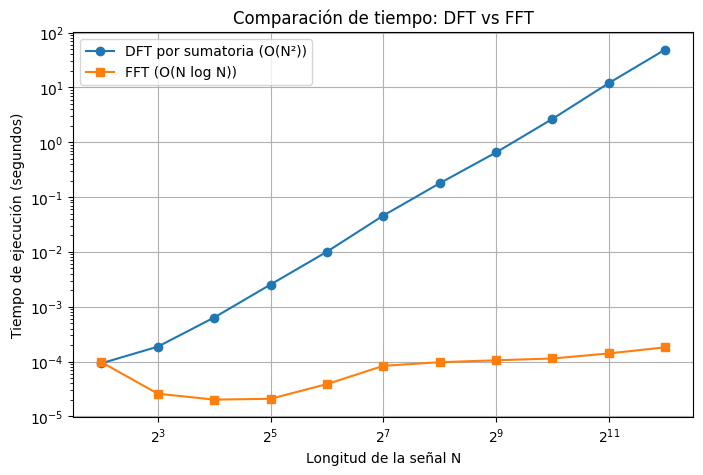

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Definición DFT mediante sumatoria
def DFT_manual(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Longitudes de prueba
N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Resultados
times_DFT = []
times_FFT = []

for N in N_values:
    x = np.random.rand(N)  # señal aleatoria

    # Tiempo DFT sumatoria
    start = time.time()
    DFT_manual(x)
    times_DFT.append(time.time() - start)

    # Tiempo FFT numpy
    start = time.time()
    np.fft.fft(x)
    times_FFT.append(time.time() - start)

# Gráfica comparativa
plt.figure(figsize=(8,5))
plt.plot(N_values, times_DFT, 'o-', label='DFT por sumatoria (O(N²))')
plt.plot(N_values, times_FFT, 's-', label='FFT (O(N log N))')
plt.xlabel('Longitud de la señal N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempo: DFT vs FFT')
plt.grid(True)
plt.legend()
plt.xscale('log', base=2)
plt.yscale('log')
plt.show()


###**1.3Consulte en qué consiste la frecuencia de -3dB y su relación con las frecuencias de corte en el filtrado espectral de señales.**
Cuando se habla de decibelios (dB), estamos expresando una relación de potencia o amplitud en una escala logarítmica.

Por definición:
$$\text{Nivel (dB)} = 10 \log_{10}\left(\frac{P_1}{P_2}\right)$$

Si se trabaja con amplitudes (voltaje, corriente o magnitud de la respuesta del sistema), la potencia es proporcional al cuadrado de la amplitud.

$$\text{Nivel (dB)} = 20 \log_{10}\left(\frac{|A_1|}{|A_2|}\right)$$

Teniendo en cuenta lo anterio, la frecuencia de los -3dB, me representa el punto donde la potencia transmitida cae a la mitad de la potencia máxima.

$$10 \log_{10}\left(\frac{1}{2}\right) \approx -3.0103 \ \text{dB}$$

####**Interpretación en términos de amplitud**

Como la potencia es proporcional al cuadrado de la amplitud:

$$\frac{P_1}{P_2} = \left(\frac{A_1}{A_2}\right)^2 = \frac{1}{2}$$

Por lo tanto:
$$\frac{A_1}{A_2} = \sqrt{\frac{1}{2}} \approx 0.707$$

De lo cual es posible dcir que en la frecuencia de −3 dB la amplitud vale el 70.7 % de su valor máximo.

####**Relación con la frecuencia de corte**

En un filtro (sea analógico o digital), la frecuencia de corte es precisamente aquella donde la ganancia del filtro cae a −3 dB respecto a la ganancia máxima (la del paso de banda o paso bajo).

-En un filtro **pasa-bajos**, el filtro deja pasar frecuencias hasta cierto punto. A partir de la **frecuencia de corte** fc, la señal empieza a atenuarse.

-En un filtro **pasa-altos**, ocurre lo inverso: las frecuencias por debajo de fc  se atenúan, mientras que a partir de la frecuencia de corte el filtro deja pasar.

Por lo tanto, la **frecuencia de corte** corresponde a la **frecuencia de −3 dB**.


####**Filtrado espectral de señales**

Al analizar una señal en el dominio de la frecuencia y se aplica un filtro espectral, normalmente  se multiplica su espectro por una ventana de ganancia (la respuesta en frecuencia del filtro).

La frecuencia de −3 dB marca la frontera entre las frecuencias que el filtro conserva y las que atenúa significativamente.

---
###**Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.**


In [ ]:
# ============================================================
# 1. Instalar yt-dlp (última versión desde GitHub)
# ============================================================
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz -q

# ============================================================
# 2. Subir cookies (opcional, solo si el video requiere login)
# ============================================================
from google.colab import files
import shutil, os

print("🔹 Si el video requiere login, selecciona el archivo 'youtube.com_cookies.txt'.")
print("🔹 Si no, puedes presionar 'Cancelar' y continuar.\n")

uploaded = files.upload()

cookies_path = None
if uploaded:
    original_name = next(iter(uploaded))
    cookies_path = "/content/cookies_yt.txt"
    if os.path.exists(cookies_path):
        os.remove(cookies_path)
    shutil.move(original_name, cookies_path)
    print(f"✅ Cookies guardadas como: {cookies_path}")
    print("\nPrimeras líneas del archivo:")
    with open(cookies_path, "r", errors="ignore") as f:
        for i, line in enumerate(f):
            if i >= 5: break
            print(line.rstrip())
else:
    print("⚠️ No se subió archivo de cookies. Se intentará sin autenticación.")

# ============================================================
# 3. Descargar canción de YouTube en formato MP3
# ============================================================
video_url = "https://www.youtube.com/watch?v=pH436MLc7kM&list=RDpH436MLc7kM&start_radio=1"

# Armar el comando yt-dlp dinámicamente (con o sin cookies)
cmd = f'yt-dlp -x --audio-format mp3 -o "%(title)s.%(ext)s" "{video_url}"'
if cookies_path:
    cmd = f'yt-dlp --cookies "{cookies_path}" -x --audio-format mp3 -o "%(title)s.%(ext)s" "{video_url}"'

print("\n🎵 Descargando la canción...\n")
!$cmd

# ============================================================
# 4. Ver archivos descargados
# ============================================================
print("\n📂 Archivos descargados:")
!ls -lh *.mp3

# ============================================================
# 5. Descargar el MP3 a tu computadora
# ============================================================
from google.colab import files
mp3_files = [f for f in os.listdir() if f.endswith(".mp3")]
if mp3_files:
    print(f"\n⬇️ Descargando: {mp3_files[0]}")
    files.download(mp3_files[0])
else:
    print("❌ No se encontró ningún archivo MP3 para descargar.")



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
🔹 Si el video requiere login, selecciona el archivo 'youtube.com_cookies.txt'.
🔹 Si no, puedes presionar 'Cancelar' y continuar.



⚠️ No se subió archivo de cookies. Se intentará sin autenticación.

🎵 Descargando la canción...

[youtube:tab] Extracting URL: https://www.youtube.com/watch?v=pH436MLc7kM&list=RDpH436MLc7kM&start_radio=1
[youtube:tab] Downloading playlist RDpH436MLc7kM - add --no-playlist to download just the video pH436MLc7kM
[youtube:tab] RDpH436MLc7kM: Downloading webpage
[download] Downloading playlist: Mix - Rata Blanca - El reino olvidado (AUDIO)
[youtube:tab] RDpH436MLc7kM page 1: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 2: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 3: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 4: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 5: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 6: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 7: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 8: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 9: Downloading API JSON
[youtube:tab] RDpH436MLc7kM page 10: Downloadin